#### Boston Housing Data Analysis

##### Problem Statement:

You are interested in building a model that will predict housing values in Boston suburbs using various predictor variables that you have available. This is your data set: boston.csv (the number of attributes has been reduced from the original form).

`Approach:`

Use Multiple Linear Regression to build your model, with the median value of owner-occupied homes as the target variable and the rest as predictors.
Determine the significance of these different predictors, and drop the ones that are not useful for your model.

Document your work and explain your decision making as you build your model.
Report your final model's accuracy - R2, MSE and MAE.

**Data set Info:**

`Title`: Boston Housing Data

`Information`: Concerns housing values in suburbs of Boston.

`Number of Observations`: 506

`Number of Attributes`: 9 (Original data set has 13 variables)

`Attribute Information`:
1. CRIM: per capita crime rate by town
2. INDUS: proportion of non-retail business acres per town
3. NOX: nitric oxides concentration (parts per 10 million)
4. RM: average number of rooms per dwelling
5. AGE: proportion of owner-occupied units built prior to 1940
6. DIS: weighted distances to five Boston employment centres
7. TAX: full-value property-tax rate per 10000(dollars)
8. PT: pupil-teacher ratio by town
9. B: 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
10. MV: Median value of owner-occupied homes in 1000's(dollars)

For more information on this dataset, see https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.names

In [ ]:
#Import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error,mean_absolute_error

In [ ]:
# load file into pandas and preview data
my_df = pd.read_csv("boston.csv")
my_df.head()

,CRIM,INDUS,NOX,RM,AGE,DIS,TAX,PT,B,MV
0,0.00632,2.31,0.538,6.575,65.199997,4.0900,296,15.300000,396.899994,24.000000
1,0.02731,7.07,0.469,6.421,78.900002,4.9671,242,17.799999,396.899994,21.600000
2,0.02729,7.07,0.469,7.185,61.099998,4.9671,242,17.799999,392.829987,34.700001
3,0.03237,2.18,0.458,6.998,45.799999,6.0622,222,18.700001,394.630005,33.400002
4,0.06905,2.18,0.458,7.147,54.200001,6.0622,222,18.700001,396.899994,36.200001


In [ ]:
#Check shape
my_df.shape

(506, 10)

In [ ]:
# check info

my_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   CRIM    506 non-null    float64
 1   INDUS   506 non-null    float64
 2   NOX     506 non-null    float64
 3   RM      506 non-null    float64
 4   AGE     506 non-null    float64
 5   DIS     506 non-null    float64
 6   TAX     506 non-null    int64  
 7   PT      506 non-null    float64
 8   B       506 non-null    float64
 9   MV      506 non-null    float64
dtypes: float64(9), int64(1)
memory usage: 39.7 KB


In [ ]:
# check for null values
my_df.isnull().sum()

CRIM     0
INDUS    0
NOX      0
RM       0
AGE      0
DIS      0
TAX      0
PT       0
B        0
MV       0
dtype: int64

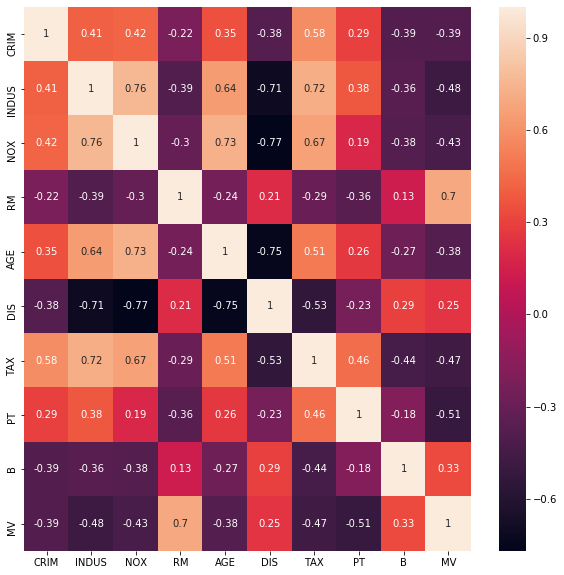

In [ ]:
## plot correlation heatmap and note down observations
plt.figure(figsize=(10,10))
sns.heatmap(my_df.corr(),annot=True)
plt.show()

From the graph above we can see that:
1. MV has a strong correlation with RM
2. NOX and DIS and negatively correlated with -0.77
3. AGE and DIS are negatively correlated with -0.75
4. INDUS and DIS are negatively correlated with -0.71

In [ ]:
# Import train/test class from sklearn module to split data into training and testing
# Using 80% of data as the training set and 20% as the test set
# Since MV (median home value) is the response variable of interest, dropping 'MV' from the train set and putting 'MV'
# as the test variable

X_train, X_test, Y_train, Y_test = train_test_split(my_df.drop("MV", axis=1), my_df['MV'], test_size = 0.2,\
                                                    random_state=112)

# Adding constant term as we are using statsmodel
X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)
my_model = sm.OLS(Y_train, X_train).fit()

In [ ]:
# from model summary - note down the R-squared and adj R-squared.
# define insignificant features and drop them if necessary
# observe the change in R-sq and adj R-sqd

print(my_model.summary())

                            OLS Regression Results                            
Dep. Variable:                     MV   R-squared:                       0.642
Model:                            OLS   Adj. R-squared:                  0.633
Method:                 Least Squares   F-statistic:                     78.34
Date:                Tue, 27 Jun 2023   Prob (F-statistic):           3.48e-82
Time:                        18:17:37   Log-Likelihood:                -1257.7
No. Observations:                 404   AIC:                             2535.
Df Residuals:                     394   BIC:                             2575.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         15.0719      6.031      2.499      0.0

Analysis of model print out:

Using all the columns (or predictor variables) in the dataset given to prdeict the response variable (MV), the R sq of our model is 0.642 and adjusted R sq is 0.633. To see if we can improve the accuracy of our model, we look at the p values for each variable.

Given a 95% confidence interval;
Setting up the hypothesis test to test for significance of each variable: The null hypothesis H0 will be that there is no impact of the given predictor variable on the response variable (MV), whereas the alternative hypothese Ha will be that there is a significant impact. We are setting the significance level (α) at 0.05, or a 95% confidence interval.

If the resulting p value is smaller than 0.05, we reject the null hypothesis in favor of the alternate and if the p value is larger that 0.05, we fail to reject the null hypothesis.

B1, B2 ... Bp = Regression coefficients for each variable
H0: B1 = B2 ... Bp = 0
Ha: B1...Bp ≠ 0
α = 0.05

Checking p values for each predictor variable:
CRIM: 0
INDUS: 0.056
NOX: 0.002
RM: 0
AGE: 0
DIS: 0
TAX: 0.549
PT: 0
B: 0.005

We can reject the null hypothesis for CRIM, NOX, RM, AGE, DIS, PT and B since they are all < 0.05 and are significant predictors for the response variable.

The only p values > 0.05 are for INDUS and TAX

Since TAX has the highest p value, it is likely the least significant predictor so we drop it first and run the model again to see if R sq and adjusted R sq have changed.


In [ ]:
# Dropping 'TAX' variable and rerunning model

X_train = X_train.drop(['TAX'], axis=1)

my_model2 = sm.OLS(Y_train, X_train).fit()

print(my_model2.summary())

                            OLS Regression Results                            
Dep. Variable:                     MV   R-squared:                       0.641
Model:                            OLS   Adj. R-squared:                  0.634
Method:                 Least Squares   F-statistic:                     88.23
Date:                Tue, 27 Jun 2023   Prob (F-statistic):           4.28e-83
Time:                        18:19:02   Log-Likelihood:                -1257.9
No. Observations:                 404   AIC:                             2534.
Df Residuals:                     395   BIC:                             2570.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         14.4115      5.925      2.432      0.0

R sq has fallen from 0.642 to 0.641
Adjusted R sq has risen from 0.633 to 0.634

Since adjusted R sq has gone up while R sq has fallen only slightly, we can conclude that dropping TAX has improved the fit of our model based on adjusted R sq which is a more reliable indicator of model fit since it taken into account useless variables.

Again, we analyze p values and note that INDUS had a p value of 0.068 which is > than our alpha of 0.05 so we will drop it and re run the model to see if it improves our values.

In [ ]:
# Check r2_score, mean_squared_error, mean_absolute_error value from sklearn using the test set

X_test = X_test.drop(['TAX'], axis=1)

In [ ]:
predictions = my_model2.predict(X_test)

print('R2  is '+str(r2_score(Y_test, predictions)))
print('MSE is '+str(mean_squared_error(Y_test, predictions)))
print('MAE is '+str(mean_absolute_error(Y_test, predictions)))

R2  is 0.725910483633261
MSE is 25.030308195709857
MAE is 3.508617903749009


In [ ]:
# Dropping 'INDUS' variable and rerunning model

X_train = X_train.drop(['INDUS'], axis=1)

my_model3 = sm.OLS(Y_train, X_train).fit()

print(my_model3.summary())

                            OLS Regression Results                            
Dep. Variable:                     MV   R-squared:                       0.638
Model:                            OLS   Adj. R-squared:                  0.632
Method:                 Least Squares   F-statistic:                     99.77
Date:                Tue, 27 Jun 2023   Prob (F-statistic):           2.16e-83
Time:                        18:19:28   Log-Likelihood:                -1259.6
No. Observations:                 404   AIC:                             2535.
Df Residuals:                     396   BIC:                             2567.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         14.4501      5.942      2.432      0.0

R sq has fallen from 0.641 to 0.638
Adjusted R sq has fallen from 0.634 to 0.632

The rest of our p values are now all within the acceptable significance level.

Adjusted R sq and R sq have both fallen marginally even though p value indicated that INDUS should be dropped, so we also check if the R2 has improved for the test set.

In [ ]:
# check all 3 metrics again

X_test = X_test.drop(['INDUS'], axis=1)

predictions = my_model3.predict(sm.add_constant(X_test))

print('R2  is '+str(r2_score(Y_test, predictions)))
print('MSE is '+str(mean_squared_error(Y_test, predictions)))
print('MAE is '+str(mean_absolute_error(Y_test, predictions)))

R2  is 0.7341993321923366
MSE is 24.273356828975995
MAE is 3.4628224778476038


R2 for the test set has gone up from 0.725 to 0.734, by dropping 'INDUS' as well.

In conclusion, to optimize model performance, we dropped 'TAX' and 'INDUS', giving us:                              
R2 from OLS on the training set: 0.638                                                                     
Adjusted R2 from OLS on training: 0.632                                                                           
R2 using sklearn on the test set: 0.734                                                                       